In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
datos = pd.read_csv('DatosZonaProp_limpios_v3.csv')

In [3]:
tabla_dinamica = pd.pivot_table(datos, values='precio', index='localizacion', aggfunc={'precio':'mean'}).sort_values('precio', ascending=False)
tabla_dinamica.head(10)

,precio
localizacion,
"Palenque de Playa, Costa Esmeralda",375000.000000
"Chapadmalal, Buenos Aires Costa Atlántica",351730.000000
"Monte del Este, Monte Hermoso",350000.000000
"Playa Chica, Mar del Plata",323645.132450
"Norte Playa, Pinamar",323039.166667
"La Frontera, Pinamar",320005.111111
"Cariló, Buenos Aires Costa Atlántica",299756.756757
"Arenas del Sur, Mar del Plata",290000.000000
"Playa Grande, Mar del Plata",287543.768657


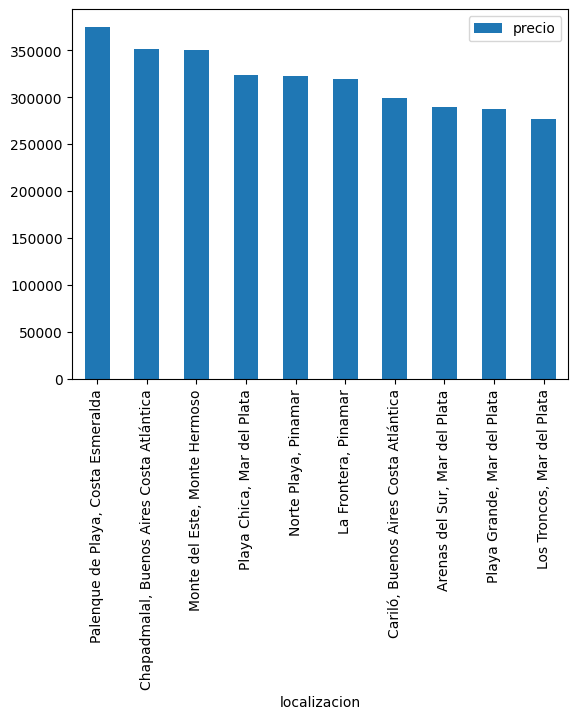

In [4]:
tabla_dinamica.head(10).plot.bar();

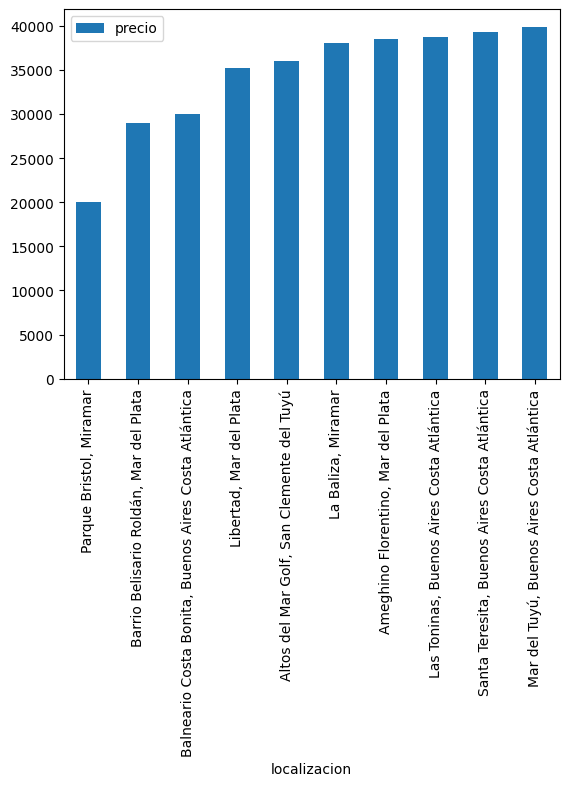

In [5]:
tabla_dinamica.tail(10).sort_values('precio',ascending=True).plot.bar();

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(datos, test_size=0.2, random_state=42)

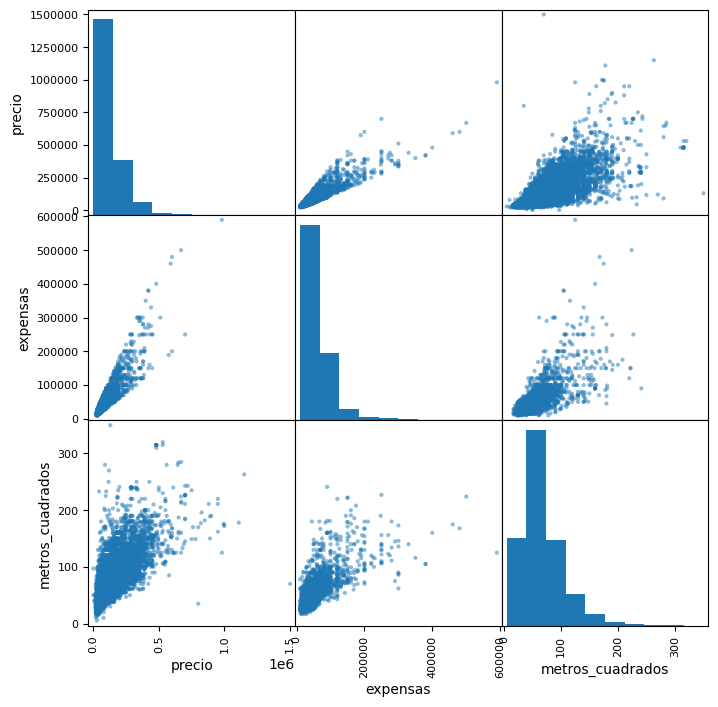

In [7]:
from pandas.plotting import scatter_matrix

scatter_matrix(datos[['precio', 'expensas', 'metros_cuadrados', ]], figsize=(8,8));

In [8]:
nuevos_datos  = datos['localizacion'].unique()
print(nuevos_datos)

['Mar del Plata, Buenos Aires Costa Atlántica'
 'Playa Grande, Mar del Plata' 'Playa Chica, Mar del Plata'
 'Pinamar, Buenos Aires Costa Atlántica' 'Güemes, Mar del Plata'
 'Playa Varese, Mar del Plata'
 'Villa Gesell, Buenos Aires Costa Atlántica' 'Alem, Mar del Plata'
 'Cariló, Buenos Aires Costa Atlántica' 'Torreón, Mar del Plata'
 'Los Troncos, Mar del Plata' 'Chauvín, Mar del Plata'
 'La Perla, Mar del Plata' 'Costa del Este, Buenos Aires Costa Atlántica'
 'La Frontera, Pinamar' 'Constitución, Mar del Plata'
 'Norte Playa, Pinamar' 'Punta Mogotes, Mar del Plata'
 'San Carlos, Mar del Plata' 'Centro, Pinamar' 'Centro, Mar del Plata'
 'Lasalle, Pinamar' 'Al Golf 19, Costa Esmeralda'
 'Stella Maris, Mar del Plata'
 'Mar de las Pampas, Buenos Aires Costa Atlántica'
 'Macrocentro, Mar del Plata' 'Leandro N. Alem, Mar del Plata'
 'Centro, Monte Hermoso' 'Barrio La Perla Norte, Mar del Plata'
 'Mar de Ostende, Pinamar' 'Chapadmalal, Buenos Aires Costa Atlántica'
 'Plaza Mitre, Centro' 'P

In [9]:
nndd = []
for i in nuevos_datos:
    i = i.split(',')
    nndd.append(i)

print(nndd)

[['Mar del Plata', ' Buenos Aires Costa Atlántica'], ['Playa Grande', ' Mar del Plata'], ['Playa Chica', ' Mar del Plata'], ['Pinamar', ' Buenos Aires Costa Atlántica'], ['Güemes', ' Mar del Plata'], ['Playa Varese', ' Mar del Plata'], ['Villa Gesell', ' Buenos Aires Costa Atlántica'], ['Alem', ' Mar del Plata'], ['Cariló', ' Buenos Aires Costa Atlántica'], ['Torreón', ' Mar del Plata'], ['Los Troncos', ' Mar del Plata'], ['Chauvín', ' Mar del Plata'], ['La Perla', ' Mar del Plata'], ['Costa del Este', ' Buenos Aires Costa Atlántica'], ['La Frontera', ' Pinamar'], ['Constitución', ' Mar del Plata'], ['Norte Playa', ' Pinamar'], ['Punta Mogotes', ' Mar del Plata'], ['San Carlos', ' Mar del Plata'], ['Centro', ' Pinamar'], ['Centro', ' Mar del Plata'], ['Lasalle', ' Pinamar'], ['Al Golf 19', ' Costa Esmeralda'], ['Stella Maris', ' Mar del Plata'], ['Mar de las Pampas', ' Buenos Aires Costa Atlántica'], ['Macrocentro', ' Mar del Plata'], ['Leandro N. Alem', ' Mar del Plata'], ['Centro', '

In [10]:
data_nombres = pd.DataFrame(nndd)
data_to_merge = pd.DataFrame(nuevos_datos, columns=['nombre_original'])
data_nombres

,0,1
0,Mar del Plata,Buenos Aires Costa Atlántica
1,Playa Grande,Mar del Plata
2,Playa Chica,Mar del Plata
3,Pinamar,Buenos Aires Costa Atlántica
4,Güemes,Mar del Plata
...,...,...
167,Barrio Ciento Ochenta,Mar del Plata
168,Barrio Felix Camet,Mar del Plata
169,Estación Norte,Mar del Plata
170,Mar de Cobo,Mar Chiquita


In [11]:
data_to_merge

,nombre_original
0,"Mar del Plata, Buenos Aires Costa Atlántica"
1,"Playa Grande, Mar del Plata"
2,"Playa Chica, Mar del Plata"
3,"Pinamar, Buenos Aires Costa Atlántica"
4,"Güemes, Mar del Plata"
...,...
167,"Barrio Ciento Ochenta, Mar del Plata"
168,"Barrio Felix Camet, Mar del Plata"
169,"Estación Norte, Mar del Plata"
170,"Mar de Cobo, Mar Chiquita"


In [12]:
nombres_localidad = pd.concat([data_nombres,data_to_merge],axis=1)
for index, row in nombres_localidad.iterrows():
    cero = row[0]
    uno = row[1]
    
    # Usar .loc para modificar la columna directamente en el DataFrame
    if uno.strip() == 'Buenos Aires Costa Atlántica':
        nombres_localidad.loc[index, 'localidad'] = cero
    elif uno.strip() == 'Centro':
        nombres_localidad.loc[index, 'localidad'] = 'Centro, Mar del Plata'
    elif uno.strip() == 'Mar Chiquita':
        nombres_localidad.loc[index, 'localidad'] = 'Mar chiquita, Provincia de Buenos Aires'
    elif uno.strip() == 'Miramar':
        nombres_localidad.loc[index, 'localidad'] = 'Miramar, Provincia de Buenos Aires'
    else:
        nombres_localidad.loc[index, 'localidad'] = uno

nombres_localidad

,0,1,nombre_original,localidad
0,Mar del Plata,Buenos Aires Costa Atlántica,"Mar del Plata, Buenos Aires Costa Atlántica",Mar del Plata
1,Playa Grande,Mar del Plata,"Playa Grande, Mar del Plata",Mar del Plata
2,Playa Chica,Mar del Plata,"Playa Chica, Mar del Plata",Mar del Plata
3,Pinamar,Buenos Aires Costa Atlántica,"Pinamar, Buenos Aires Costa Atlántica",Pinamar
4,Güemes,Mar del Plata,"Güemes, Mar del Plata",Mar del Plata
...,...,...,...,...
167,Barrio Ciento Ochenta,Mar del Plata,"Barrio Ciento Ochenta, Mar del Plata",Mar del Plata
168,Barrio Felix Camet,Mar del Plata,"Barrio Felix Camet, Mar del Plata",Mar del Plata
169,Estación Norte,Mar del Plata,"Estación Norte, Mar del Plata",Mar del Plata
170,Mar de Cobo,Mar Chiquita,"Mar de Cobo, Mar Chiquita","Mar chiquita, Provincia de Buenos Aires"


In [13]:
nombres_localidad.head(50)

,0,1,nombre_original,localidad
0,Mar del Plata,Buenos Aires Costa Atlántica,"Mar del Plata, Buenos Aires Costa Atlántica",Mar del Plata
1,Playa Grande,Mar del Plata,"Playa Grande, Mar del Plata",Mar del Plata
2,Playa Chica,Mar del Plata,"Playa Chica, Mar del Plata",Mar del Plata
3,Pinamar,Buenos Aires Costa Atlántica,"Pinamar, Buenos Aires Costa Atlántica",Pinamar
4,Güemes,Mar del Plata,"Güemes, Mar del Plata",Mar del Plata
5,Playa Varese,Mar del Plata,"Playa Varese, Mar del Plata",Mar del Plata
6,Villa Gesell,Buenos Aires Costa Atlántica,"Villa Gesell, Buenos Aires Costa Atlántica",Villa Gesell
7,Alem,Mar del Plata,"Alem, Mar del Plata",Mar del Plata
8,Cariló,Buenos Aires Costa Atlántica,"Cariló, Buenos Aires Costa Atlántica",Cariló
9,Torreón,Mar del Plata,"Torreón, Mar del Plata",Mar del Plata


In [14]:
for index, row in nombres_localidad.iterrows():
    cero = row[0]
    uno = row[1]
    localidad = row['localidad']
    ciudades_con_barrios = ['Mar del Plata' , 'Pinamar', 'Miramar', 'Mar Chiquita', 'Necochea', 'San Clemente del Tuyú', 'Costa del Este']
    # Usar .loc para modificar la columna directamente en el DataFrame
    if uno.strip() in ciudades_con_barrios:
        nombres_localidad.loc[index, 'barrio'] = cero.replace('Barrio', '')
    else:
        nombres_localidad.loc[index, 'barrio'] = None
nombres_localidad

,0,1,nombre_original,localidad,barrio
0,Mar del Plata,Buenos Aires Costa Atlántica,"Mar del Plata, Buenos Aires Costa Atlántica",Mar del Plata,None
1,Playa Grande,Mar del Plata,"Playa Grande, Mar del Plata",Mar del Plata,Playa Grande
2,Playa Chica,Mar del Plata,"Playa Chica, Mar del Plata",Mar del Plata,Playa Chica
3,Pinamar,Buenos Aires Costa Atlántica,"Pinamar, Buenos Aires Costa Atlántica",Pinamar,None
4,Güemes,Mar del Plata,"Güemes, Mar del Plata",Mar del Plata,Güemes
...,...,...,...,...,...
167,Barrio Ciento Ochenta,Mar del Plata,"Barrio Ciento Ochenta, Mar del Plata",Mar del Plata,Ciento Ochenta
168,Barrio Felix Camet,Mar del Plata,"Barrio Felix Camet, Mar del Plata",Mar del Plata,Felix Camet
169,Estación Norte,Mar del Plata,"Estación Norte, Mar del Plata",Mar del Plata,Estación Norte
170,Mar de Cobo,Mar Chiquita,"Mar de Cobo, Mar Chiquita","Mar chiquita, Provincia de Buenos Aires",Mar de Cobo


In [15]:
for index, row in nombres_localidad.iterrows():
    localidad = row['localidad']
    barrio = row['barrio']
    if barrio is None:
        nombres_localidad.loc[index, 'query'] = localidad
    else:
        nombres_localidad.loc[index, 'query'] = f'{barrio}, {localidad}'
nombres_localidad.head(50)

,0,1,nombre_original,localidad,barrio,query
0,Mar del Plata,Buenos Aires Costa Atlántica,"Mar del Plata, Buenos Aires Costa Atlántica",Mar del Plata,None,Mar del Plata
1,Playa Grande,Mar del Plata,"Playa Grande, Mar del Plata",Mar del Plata,Playa Grande,"Playa Grande, Mar del Plata"
2,Playa Chica,Mar del Plata,"Playa Chica, Mar del Plata",Mar del Plata,Playa Chica,"Playa Chica, Mar del Plata"
3,Pinamar,Buenos Aires Costa Atlántica,"Pinamar, Buenos Aires Costa Atlántica",Pinamar,None,Pinamar
4,Güemes,Mar del Plata,"Güemes, Mar del Plata",Mar del Plata,Güemes,"Güemes, Mar del Plata"
5,Playa Varese,Mar del Plata,"Playa Varese, Mar del Plata",Mar del Plata,Playa Varese,"Playa Varese, Mar del Plata"
6,Villa Gesell,Buenos Aires Costa Atlántica,"Villa Gesell, Buenos Aires Costa Atlántica",Villa Gesell,None,Villa Gesell
7,Alem,Mar del Plata,"Alem, Mar del Plata",Mar del Plata,Alem,"Alem, Mar del Plata"
8,Cariló,Buenos Aires Costa Atlántica,"Cariló, Buenos Aires Costa Atlántica",Cariló,None,Cariló
9,Torreón,Mar del Plata,"Torreón, Mar del Plata",Mar del Plata,Torreón,"Torreón, Mar del Plata"


In [16]:
from geopy.geocoders import Nominatim
import time

# Initialize Nominatim Geocoder
geolocator = Nominatim(user_agent="geoapi")
longitud = []
latitud = []
ciudades = []
nombre_api = []
for index, row in nombres_localidad.iterrows():
    query = row['query']
    time.sleep(1)
    location = geolocator.geocode(query)
    print(f"Processing {index}/{len(nombres_localidad)}, {query}{' '*100} ", end="\r", flush=True)
    if location is not None:
        nombres_localidad.loc[index, 'latitud'] = location.latitude
        nombres_localidad.loc[index, 'longitud'] = location.longitude
        nombres_localidad.loc[index, 'geocode'] = location.address
    else:
        continue

Processing 171/172, Costayres,  Costa del Este                                                                                                                               

In [17]:
nombres_localidad_2 = pd.DataFrame()
for index, row in nombres_localidad.iterrows():
    query = row['query']
    latitud = row['latitud']
    longitud = row['longitud']
    no_incluir = ['Ostende', 'Miramar', 'Atlántida', 'Las Gaviotas', 'Santa Teresita', 'Costa Azul', 'Colonia Marina', 'San Bernardo']
    if query not in no_incluir:
        nombres_localidad_2.loc[index, 'latitud'] = latitud
        nombres_localidad_2.loc[index, 'longitud'] = longitud
        nombres_localidad_2.loc[index, 'query'] = query

In [18]:
nombres_localidad_2

,latitud,longitud,query
0,-37.997617,-57.548208,Mar del Plata
1,-38.024321,-57.541179,"Playa Grande, Mar del Plata"
2,-38.020489,-57.527620,"Playa Chica, Mar del Plata"
3,-37.109949,-56.853901,Pinamar
4,-38.015211,-57.551916,"Güemes, Mar del Plata"
...,...,...,...
167,NaN,NaN,"Ciento Ochenta, Mar del Plata"
168,-37.957253,-57.539135,"Felix Camet, Mar del Plata"
169,-37.988477,-57.564526,"Estación Norte, Mar del Plata"
170,-37.772725,-57.450811,"Mar de Cobo, Mar chiquita, Provincia de Buenos..."


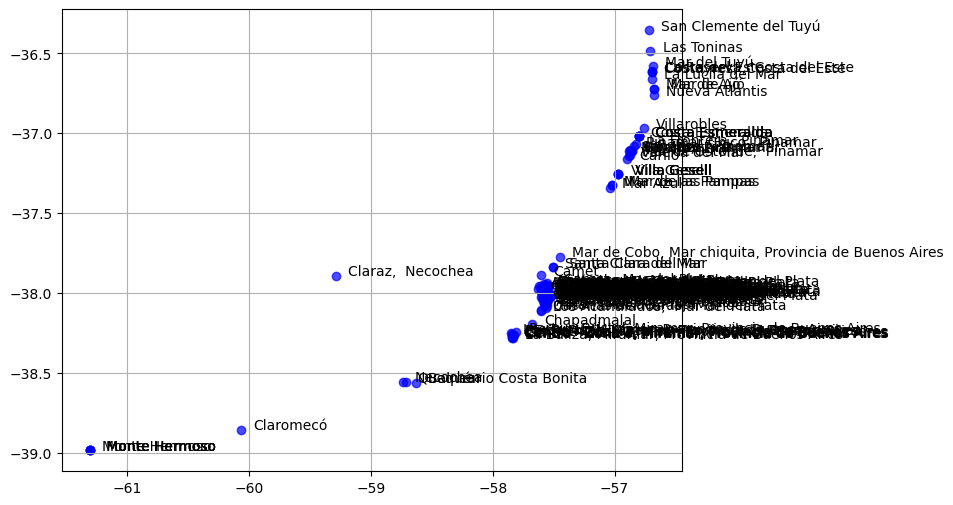

In [19]:
import matplotlib.pyplot as plt
# Nube de puntos con Matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(nombres_localidad_2['longitud'], nombres_localidad_2['latitud'], color='blue', alpha=0.7)

for i, row in nombres_localidad_2.iterrows():
    plt.text(row['longitud'] + 0.1, row['latitud'], row['query'], fontsize=10, color='black')


plt.grid(True)
plt.show()

In [20]:
barrios_mdq = nombres_localidad_2[nombres_localidad_2['query'] .str.contains('Mar del Plata', case=False, na=False)]
barrios_mdq

,latitud,longitud,query
0,-37.997617,-57.548208,Mar del Plata
1,-38.024321,-57.541179,"Playa Grande, Mar del Plata"
2,-38.020489,-57.527620,"Playa Chica, Mar del Plata"
4,-38.015211,-57.551916,"Güemes, Mar del Plata"
5,-38.014176,-57.530493,"Playa Varese, Mar del Plata"
...,...,...,...
163,-38.032967,-57.595750,"El Martillo, Mar del Plata"
165,-37.957838,-57.622846,"Ameghino Florentino, Mar del Plata"
167,NaN,NaN,"Ciento Ochenta, Mar del Plata"
168,-37.957253,-57.539135,"Felix Camet, Mar del Plata"


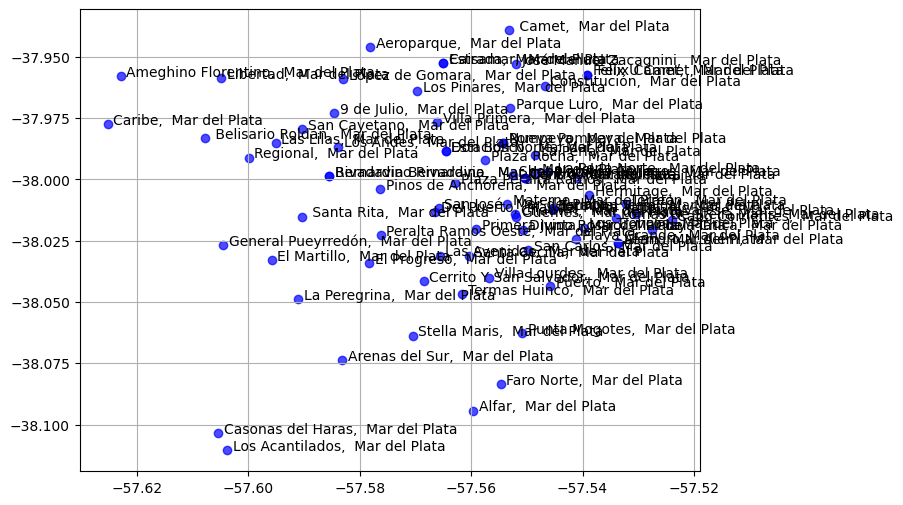

In [21]:
import matplotlib.pyplot as plt
# Nube de puntos con Matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(barrios_mdq['longitud'], barrios_mdq['latitud'], color='blue', alpha=0.7)

for i, row in barrios_mdq.iterrows():
    plt.text(row['longitud'] + 0.001, row['latitud'], row['query'], fontsize=10, color='black')


plt.grid(True)
plt.show()

In [22]:
import re

# Función para verificar si hay números en el texto
def contiene_numeros(texto):
    return 1 if re.search(r'\d', texto) else 0

# Aplicar la función a la columna y crear una nueva columna
prueba.loc[: ,'contiene_numeros'] = prueba['nombre'].apply(contiene_numeros)

prueba

NameError: name 'prueba' is not defined

In [ ]:
datos['nombre'].iloc[8]

In [ ]:
def prueba_direccion(text):
    found = re.findall(r'^(?:\S+\s)*\d+', text)
    return found

prueba.insert(3, 'dirección',prueba['nombre'].apply(prueba_direccion))
prueba